In [ ]:
Bar Graph

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "bar_assignment.csv"  # Update this with your file path
df = pd.read_csv(file_path)

# Transform COUNT values (1 -> 'Yes', 0 -> 'No')
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Pivot data to get counts per LABEL category
transformed_data = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Reset index for a clean format
transformed_data.reset_index(inplace=True)

# Rename columns for clarity
transformed_data.columns = ['LABEL', 'No', 'Yes']

# Save the transformed data to a CSV file
output_file = "transformed_bar_data.csv"  # Name of output file
transformed_data.to_csv(output_file, index=False)

print(f"Transformed data saved as {output_file}")


FileNotFoundError: [Errno 2] No such file or directory: 'bar_assignment.csv'

Sankey Graph

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Load CSV
file_path = "sankey_assignment.csv"  # Ensure the file is uploaded
df = pd.read_csv(file_path)

# Extract node labels
sources = df.columns[1:9].tolist()  # Source nodes (PS to RGS)
middle = df["LABEL"].unique().tolist()  # Middle nodes (S, F, D, etc.)
targets = df.columns[9:].tolist()  # Target nodes (Reg, Aca, Oth)

# Create a list of all labels
labels = sources + middle + targets

# Build Sankey links
source_to_middle_links = []
middle_to_target_links = []

for _, row in df.iterrows():
    middle_node = row["LABEL"]

    # Source → Middle
    for source in sources:
        value = row[source]
        if value > 0:
            source_to_middle_links.append((source, middle_node, value))

    # Middle → Target
    for target in targets:
        value = row[target]
        if value > 0:
            middle_to_target_links.append((middle_node, target, value))

# Combine all links
all_links = source_to_middle_links + middle_to_target_links

# Convert labels to indices
sources_indices = [labels.index(source) for source, target, _ in all_links]
targets_indices = [labels.index(target) for source, target, _ in all_links]
values = [value for _, _, value in all_links]

# Define colors
node_colors = ['#6a0dad' if label in sources else '#808080' if label in middle else '#000000' for label in labels]
link_colors = ['rgba(106,13,173,0.5)' for _ in range(len(sources_indices))]

# Create Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources_indices,
        target=targets_indices,
        value=values,
        color=link_colors
    )
))

# Layout settings
fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(size=14, color='white'),
    paper_bgcolor='black'
)

# Show the figure
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sankey_assignment.csv'

Network Graph

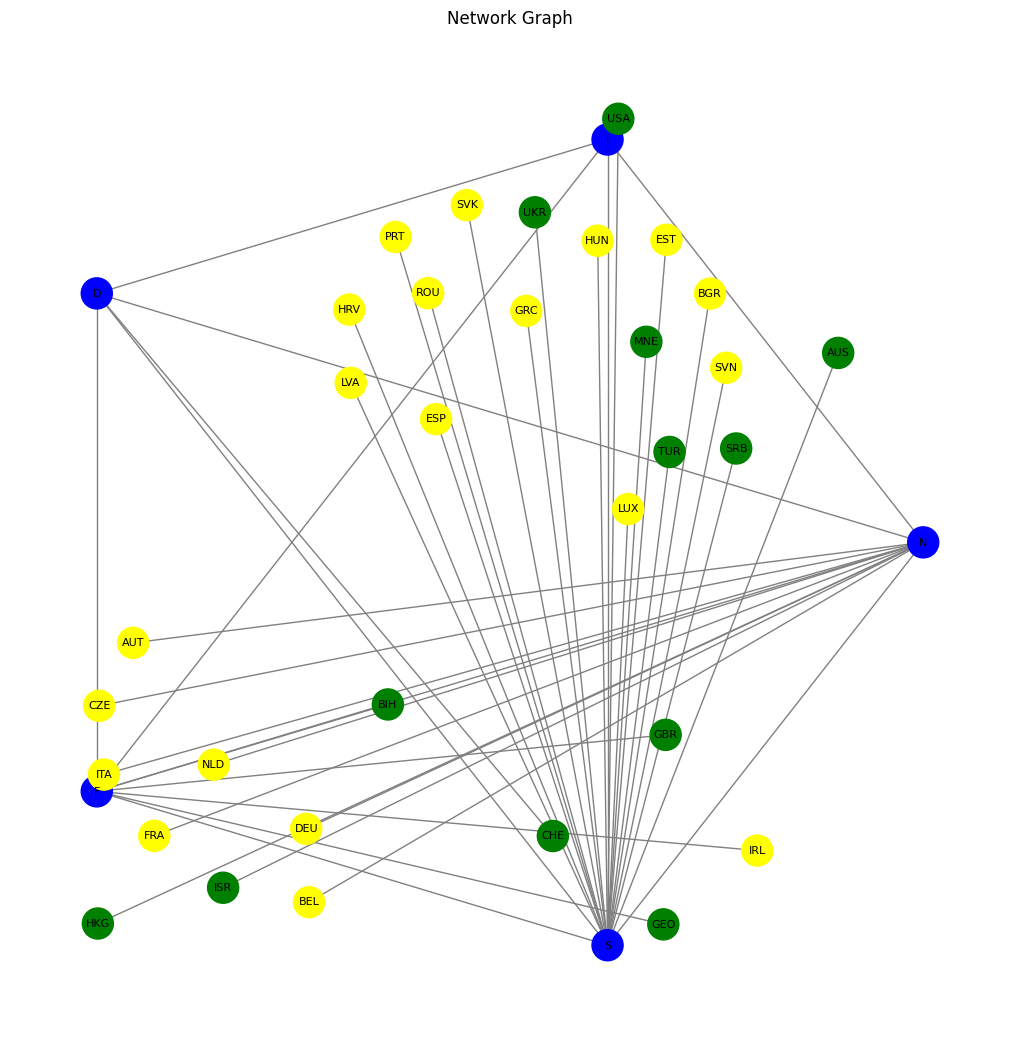

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define adjacency matrix manually
data = {
    'D': {'F': 3, 'I': 1, 'N': 3, 'S': 3},
    'F': {'D': 3, 'I': 1, 'N': 1, 'S': 1},
    'I': {'D': 1, 'F': 1, 'N': 1, 'S': 1},
    'N': {'D': 3, 'F': 1, 'I': 1, 'S': 2},
    'S': {'D': 3, 'F': 1, 'I': 1, 'N': 2},
    'BIH': {'F': 1}, 'GEO': {'F': 1}, 'ISR': {'N': 2}, 'MNE': {'S': 2}, 'SRB': {'S': 2},
    'CHE': {'D': 1}, 'TUR': {'S': 2}, 'UKR': {'S': 2}, 'GBR': {'F': 2}, 'AUS': {'S': 1},
    'HKG': {'N': 1}, 'USA': {'S': 1},
    'AUT': {'N': 2}, 'BEL': {'N': 2}, 'BGR': {'S': 2}, 'HRV': {'S': 2}, 'CZE': {'N': 2},
    'EST': {'S': 2}, 'FRA': {'N': 2}, 'DEU': {'N': 3}, 'GRC': {'S': 3}, 'HUN': {'S': 2},
    'IRL': {'F': 1}, 'ITA': {'N': 2}, 'LVA': {'S': 2}, 'LUX': {'S': 2}, 'NLD': {'N': 4},
    'PRT': {'S': 2}, 'ROU': {'S': 2}, 'SVK': {'S': 2}, 'SVN': {'S': 2}, 'ESP': {'S': 3}
}

# Create a graph
G = nx.Graph()

# Define node categories
central_nodes = {'D', 'F', 'I', 'N', 'S'}
blue_nodes = central_nodes
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL',
                'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

# Add nodes with attributes
for node in data.keys():
    if node in blue_nodes:
        G.add_node(node, color='blue')
    elif node in green_nodes:
        G.add_node(node, color='green')
    elif node in yellow_nodes:
        G.add_node(node, color='yellow')
    else:
        G.add_node(node, color='gray')  # Default color

# Add edges based on the adjacency dictionary
for node1, edges in data.items():
    for node2, weight in edges.items():
        G.add_edge(node1, node2, weight=weight)

# Get positions: central pentagram for specific nodes
angle = np.linspace(0, 2*np.pi, 6)[:-1]  # Angles for 5 points
pentagram_positions = {node: (np.cos(a), np.sin(a)) for node, a in zip(central_nodes, angle)}

# Spread other nodes outside
external_positions = nx.spring_layout(G, seed=42)  # Initial layout
for node in pentagram_positions:
    external_positions.pop(node, None)  # Remove central nodes from spring layout

# Merge layouts
positions = {**pentagram_positions, **external_positions}

# Ensure all nodes have color attributes
for node in G.nodes:
    if 'color' not in G.nodes[node]:
        G.nodes[node]['color'] = 'gray'  # Assign default color

# Draw the graph
plt.figure(figsize=(10, 10))
colors = [G.nodes[n]['color'] for n in G.nodes]
nx.draw(G, pos=positions, with_labels=True, node_color=colors, edge_color='gray', node_size=500, font_size=8)

# Show the graph
plt.title("Network Graph")
plt.show()
